## <center>Описание задачи:</center>

    Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

    Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### <center>Описание датасета</center>

    Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

### Подключаем нужные библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

### Загружаем данные:

In [3]:
# загружаем наш датасет:

data = pd.read_csv('stud_math.csv')
display(data.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
320,GP,F,17,U,GT3,A,4.0,3.0,services,services,course,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,yes,yes,5.0,2.0,2.0,5.0,23.0,65.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
220,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,reputation,mother,2.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,2.0,5.0,NaN,2.0,30.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
341,GP,M,18,U,GT3,T,4.0,4.0,teacher,NaN,home,father,1.0,2.0,1.0,no,yes,NaN,yes,NaN,-6.0,yes,yes,no,4.0,3.0,3.0,2.0,0.0,0.0
100,GP,M,16,U,GT3,T,4.0,4.0,services,services,other,mother,1.0,1.0,0.0,yes,yes,yes,yes,yes,-3.0,yes,yes,no,4.0,5.0,5.0,4.0,14.0,25.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,no,yes,no,-6.0,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,other,mother,2.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0


In [4]:
# проверяем информацию о колонках датафрейма
display(data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

В описании датасета говорится о 29 колонках, а у нас их 30. Колонка <b><i>studytime, granular</i></b> "лишняя", надо будет разобраться какие данные в ней содержаться.

### <center>"Входной" анализ данных:</center>

В нашем датасете содержится 30 (хотя в описании всего 29) столбцов. Их можно разделить на несколько категорий:
1. Числовые: 3 столбца (age, absences, score)
2. 2 значения: 12 столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic). Эти столбцы, после некоторых преобразований, можно считать бинарными.
3. Несколько "фиксированных" значений: 13 столбцов (Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health). Данные стобцы можно рассматривать как категориальные признаки.
4. Остальные значения: school и неизвестный нам столбец "studytime, granular".

In [5]:
# Переименуем столбцы для удобства дальнейшей работы:

data.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu', 'Fedu': 'f_edu',
                     'Mjob': 'm_job', 'Fjob': 'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [6]:
# проверяем что не забыли какой-нибудь столбец:

display(data.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   famsize       368 non-null    object 
 5   p_status      350 non-null    object 
 6   m_edu         392 non-null    float64
 7   f_edu         371 non-null    float64
 8   m_job         376 non-null    object 
 9   f_job         359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  traveltime    367 non-null    float64
 13  studytime     388 non-null    float64
 14  failures      373 non-null    float64
 15  schoolsup     386 non-null    object 
 16  famsup        356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

None

### <center>Функции для дальнейшей работы:<center>

In [7]:
# Смотрим на значения в столбце и считаем количество пустых значений:
def quick_analize(df_col):
    display(df_col.value_counts())
    if df_col.isnull().value_counts()[False] != len(data):
        display('В столбце обнаружено {} пустых значений.'.format(
            df_col.isnull().value_counts()[True]))
    else:
        display('В столбце пустых значений не обнаружено.')


# Строим боксплот заданных размеров
def get_boxplot(column, width, height):
    fig, ax = plt.subplots(figsize=(width, height))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

### <center>Рассматриваем отдельные столбцы</center>

#### Начнем с числовых признаков:

#### 1. score - баллы по госэкзамену по математике

Наш целевой параметр, так-что анализ начнем с него.

In [8]:
quick_analize(data.score)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

'В столбце обнаружено 6 пустых значений.'

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

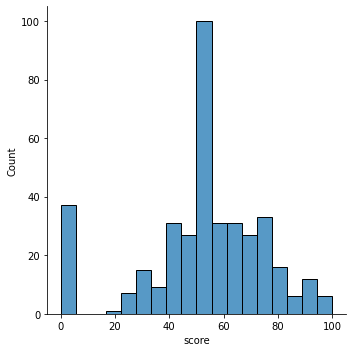

In [9]:
sns.displot(data.score, bins=len(data.score.value_counts()))
data.score.describe()

Судя по данным в столбце при оценке использовалась 100-бальная система. Присутствует 6 пустых значений. Выбросов формально нет, но, по гистограмме видно, что если у нас много нулевых значений. Чем вызвано появление нулевых значений мы можем только предполагать, возможно это ошибки в данных, а возможно это ученики, которые просто не пришли на экзамен. В любом случае для нашей модели строки с нулевым значением score будут бесполезны, так-что их придется удалить (хотя их и не мало). Так-же придется поступить и с пустыми значениями.

In [10]:
data = data.loc[data.score > 0]

In [11]:
# проверяем сколько осталось строк в таблице:

len(data)

352

In [12]:
# посмотрим на получившееся распределение score:

data.score.iplot(kind='histogram')

Видно что распределение действительно стало "околонормальным" но слегка "приплюснутым". Такое распределение получилось из-за большого стандартного отклонения (std = 16.2) и достаточно малого числа околомедианных значений.

In [13]:
# Перепроверим что получилось:

quick_analize(data.score)

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

'В столбце пустых значений не обнаружено.'

Мы "очистили" целевую переменную от пропусков и от нулевых значений, но, к сожалению, размер нашего датасета сократился на 43 строки. Больше он (датасет) сокращаться не должен т.к. в остальных переменных мы можем не удалять, а заменять пустые и неправильные значения.

#### 2. age - возраст ученика

In [14]:
quick_analize(data.age)

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

'В столбце пустых значений не обнаружено.'

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

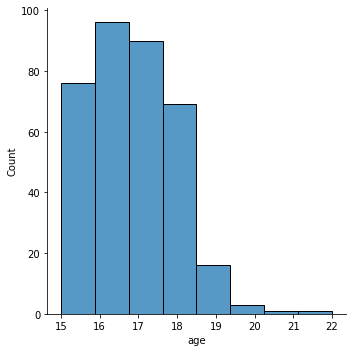

In [15]:
sns.displot(data.age, bins=len(data.age.value_counts()))
data.age.describe()

В данном столбце пропусков нет, а все значения укладываются в ожидаемый диапазон от 15 до 22. Однако у нас всего по одному значению 21 и 22, которые, возможно, являются выбросами.
Проверим это:

Медиана: 17.0 
1-й квартиль: 16.0 
3-й квартиль: 18.0 
Межквартильный размах: 2.0 
Границы выбросов: [13.0, 21.0]


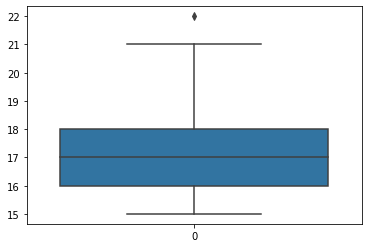

In [16]:
sns.boxplot(data=data.age)
med = data.age.median()
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Видно что выбросом является только значение 22, значени 21 укладывается в диапазон. Однако, по условию задачи, возраст 22 является допустимым, поэтому мы не можем его просто так удалить.

In [17]:
# Посмотрим на распределение возраста подробнее:
data['age'].iplot(kind='histogram')

Видно что распределение имеет длинный "хвост" справа, учеников старше 18 лет совсем мало. Пока эта иформация нам ничего не дает, переходим к следующему столбцу.

#### 3. absences - количество пропущенных занятий

In [18]:
quick_analize(data.absences)

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

'В столбце обнаружено 10 пустых значений.'

count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

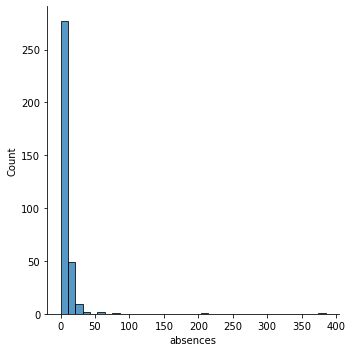

In [19]:
sns.displot(data.absences, bins=len(data.absences.value_counts()))
data.absences.describe()

В данном столбце присутствует слишком много различных значений, некоторые из которых явно являются выбросами. Так-же присутсвует 10 пустых значений.

Медиана: 4.0 
1-й квартиль: 2.0 
3-й квартиль: 8.0 
Межквартильный размах: 6.0 
Границы выбросов: [-7.0, 17.0]


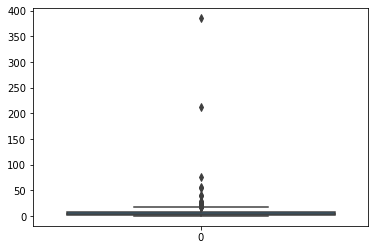

In [20]:
# Проверим наши догадки насчет выбросов:

sns.boxplot(data=data.absences)
med = data.absences.median()
Q1 = data.absences.quantile(0.25)
Q3 = data.absences.quantile(0.75)
IQR = Q3 - Q1
print('Медиана: {} \n1-й квартиль: {} \n3-й квартиль: {} \nМежквартильный размах: {} \nГраницы выбросов: [{}, {}]'
      .format(med, Q1, Q3, IQR, (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)))

Судя по всему выбросы в данных действительно есть, но совсем не факт что они вызваны ошибками в данных. Возможно, что столь большое количество пропусков вызвано болезнью или каким-либо иным подобным фактом. 
Кроме того мы не знаем сколько всего было занятий, а однозначно считать "аномальным" можно либо отрицательные значения, либо значения превышающие общее число занятий.
По боксплоту видно что у нас есть 2 слишком "оторванных" от остальных значения (больше 200, когда остальные меньше 100). Предлагаю удалить только их, т.к. они могут в дальнейшем повлиять на результаты.

In [21]:
data.loc[data['absences'] > 200, 'absences'] = np.nan

<AxesSubplot:>

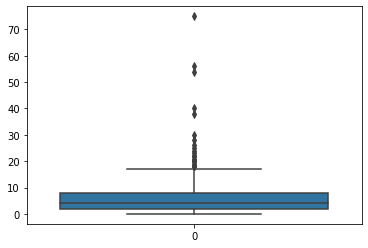

In [22]:
# Смотрим на изменившийся боксплот:

sns.boxplot(data=data.absences)

In [23]:
# Посмотрим на распределение пропусков подробнее:

data['absences'].iplot(kind='histogram')

Видно что распределение имеет длинный "хвост" справа. У большинства учеников либо вовсе нет пропусков, либо их количество невелико. После того как мы удалили 2 самых высоких значения в наших данных стало 12 пропусков.

#### Теперь рассмотрим столбцы с неизвестным типом содержимого:

#### 1. school - аббревиатура школы, в которой учится ученик

In [24]:
quick_analize(data.school)

GP    311
MS     41
Name: school, dtype: int64

'В столбце пустых значений не обнаружено.'

В нашем датасете всего 2 типа школ, так-что данный столбец можно отнести к бинарному типу. Кроме того столбец не содержит ни одного пропуска. 

#### 2. studytime_gr - столбец которого нет в описании датасета

In [25]:
quick_analize(data.studytime_gr)

-6.0     173
-3.0      90
-9.0      58
-12.0     24
Name: studytime_gr, dtype: int64

'В столбце обнаружено 7 пустых значений.'

count    345.000000
mean      -6.139130
std        2.522758
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gr, dtype: float64

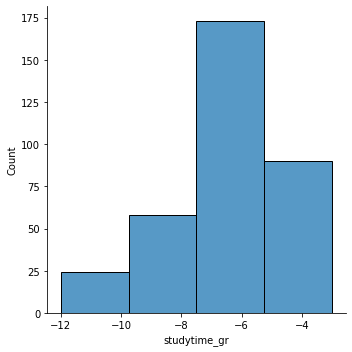

In [26]:
sns.displot(data.studytime_gr, bins=len(data.studytime_gr.value_counts()))
data.studytime_gr.describe()

Столбец содержит значения 4-ех типов и 7 пропусков. Пока мы ничего не можем сказать о том что он означает.

#### Переходим к категориальным признакам:

#### 1. m_edu - образование матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [27]:
quick_analize(data.m_edu)

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: m_edu, dtype: int64

'В столбце обнаружено 2 пустых значений.'

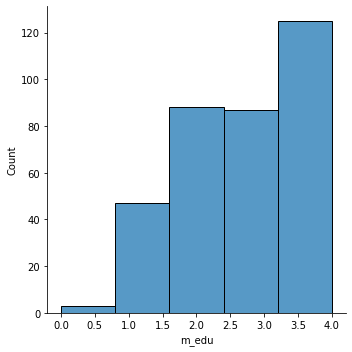

In [28]:
# посмотрим на распределение для данного столбца:

sns.displot(data.m_edu, bins=5)

Столбец <b><i>m_edu</b></i> содержит 5 различных значений, как в описании. Есть 2 пустых значения. Можно заметить что значение 0 встречается всего 3 раза, но, т.к. по описанию датасета такой вариант допустим, то мы не будем считать его выбросом.

#### 2. f_edu - образование отца
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
quick_analize(data.f_edu)

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: f_edu, dtype: int64

'В столбце обнаружено 21 пустых значений.'

Видно что в датасете есть одно неверное значение: 40. Данное значение является ошибочным, предлагаю его удалить:

In [30]:
data.loc[data['f_edu'] == 40.0, 'f_edu'] = np.nan

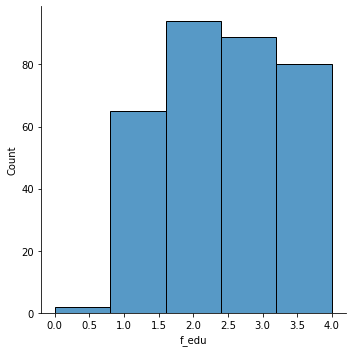

In [31]:
# Посмотрим на получившееся распределение:

sns.displot(data.f_edu, bins=5)

В столбеце <b><i>f_edu</b></i> присутствовало одно ошибочное значение, которое мы удалили после чего получилось 22 пустых значений. Так-же как и с <b><i>m_edu</b></i> 0 встречается очень редко (2 раза).

#### 3. m_job - работа матери

In [32]:
quick_analize(data.m_job)

other       115
services     90
teacher      51
at_home      49
health       30
Name: m_job, dtype: int64

'В столбце обнаружено 17 пустых значений.'

В столбеце <b><i>m_job</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, но присутсвует 17 пустых значений.

#### 4. f_job - работа отца

In [33]:
quick_analize(data.f_job)

other       176
services     89
teacher      26
health       15
at_home      14
Name: f_job, dtype: int64

'В столбце обнаружено 32 пустых значений.'

Также как и с <b><i>m_job</b></i> столбец <b><i>f_job</b></i> содержит 5 значений. Ошибок в данных нет, но пустых значений стало больше (32).

#### 5. reason - причина выбора школы

In [34]:
quick_analize(data.reason)

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

'В столбце обнаружено 15 пустых значений.'

В столбце <b><i>reason</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 15 пустых значений.

#### 6. guardian — опекун

In [35]:
quick_analize(data.guardian)

mother    225
father     78
other      20
Name: guardian, dtype: int64

'В столбце обнаружено 29 пустых значений.'

В столбце <b><i>guardian</b></i> содержится 3 значения, как в описании. Ошибочных значений нет, присутсвует 29 пустых значений.

#### 7. traveltime - время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [36]:
quick_analize(data.traveltime)

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

'В столбце обнаружено 23 пустых значений.'

В столбце <b><i>traveltime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 23 пустых значений. Можно заметить что бОльшая часть учеников живет недалеко от школы.

#### 8. studytime - время на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [37]:
quick_analize(data.studytime)

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

'В столбце обнаружено 7 пустых значений.'

In [38]:
# Мы уже видели похожее распределение в столбце studytime_gr. Надо рассмотреть 2 столбца вместе:

data.loc[:, ['studytime', 'studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [39]:
# Похоже что столбец studytime_gr это просто studytime, умноженный на -3.
# Что-бы убедиться в этом, можно проверить корреляцию между ними:

data['studytime'].corr(data['studytime_gr'])

-0.9999999999999998

In [40]:
# Полная обратная корреляция означает что один из столбцов можно спокойно удалить:

data.drop(['studytime_gr'], inplace=True, axis=1)

Cтолбец <b><i>studytime</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 7 пустых значений. Помимо этого мы выяснили что неизвестный нам столбец <b><i>studytime_gr</b></i> оказался всего-лишь копией столбца <b><i>studytime</b></i>, умноженной на -3, что позволило нам удалить его.

#### 9. failures — количество внеучебных неудач 
(n, если 1<=n<=3, иначе 0)

In [41]:
quick_analize(data.failures)

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

'В столбце обнаружено 20 пустых значений.'

В столбце <b><i>failures</b></i> содержится 4 значения, как в описании. Ошибочных значений нет, присутсвует 20 пустых значений. Можно заметить что у абсолютного большинства учеников неудач нет.

#### 10. famrel - семейные отношения 
(от 1 - очень плохо до 5 - очень хорошо)

In [42]:
quick_analize(data.famrel)

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

'В столбце обнаружено 24 пустых значений.'

In [43]:
# В столбце famrel обнаружилось одно ошибочное значение (-1), которого нет в описании датасета. Его следует удалить:

data.loc[data['famrel'] == -1.0, 'famrel'] = np.nan

In [44]:
# Проверяем что получилось:
quick_analize(data.famrel)

4.0    163
5.0     88
3.0     56
2.0     14
1.0      6
Name: famrel, dtype: int64

'В столбце обнаружено 25 пустых значений.'

В столбце <b><i>famrel</b></i> содержится 5 значений, как в описании. Присутствовало 1 ошибочное значение (удалено). В столбце 25 пропусков.

#### 11. freetime — свободное время после школы 
(от 1 - очень мало до 5 - очень мого)

In [45]:
quick_analize(data.freetime)

3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64

'В столбце обнаружено 8 пустых значений.'

В столбце <b><i>freetime</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 8 пропусков.

#### 12. goout — проведение времени с друзьями 
(от 1 - очень мало до 5 - очень много)

In [46]:
quick_analize(data.goout)

3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64

'В столбце обнаружено 6 пустых значений.'

В столбце <b><i>goout </b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 6 пропусков.

#### 13. health — текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

In [47]:
quick_analize(data.health)

5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64

'В столбце обнаружено 13 пустых значений.'

В столбце <b><i>health</b></i> содержится 5 значений, как в описании. Ошибочных значений нет, 13 пропусков.

#### "Бинарные" столбцы

У нас осталось 12 "Бинарных" столбцов и столбец <i><b>school</i></b>, который, как мы выяснили, тоже имеет всего 2 значения.
Можно попробовать обработать их все вместе:

In [48]:
# создадим список "бинарных" колонок:

bin_cols = ['school', 'sex', 'address', 'famsize', 'p_status', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [49]:
# проверяем что во всех колонках содержится по 2 значения:

for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)]
    if data[col].isnull().value_counts()[False] != len(data):
        empty = data[col].isnull().value_counts()[True]
    else:
        empty = 0
    if len(x) == 2:
        print('Столбец {} содержит 2 уникальных значения: [{}, {}] и {} пустых значений.'
              .format(col, x[0], x[1], empty))
    else:
        print('ВНИМАНИЕ! Столбец {} содержит больше 2 уникальных значений!'.format(col))

Столбец school содержит 2 уникальных значения: [GP, MS] и 0 пустых значений.
Столбец sex содержит 2 уникальных значения: [F, M] и 0 пустых значений.
Столбец address содержит 2 уникальных значения: [U, R] и 14 пустых значений.
Столбец famsize содержит 2 уникальных значения: [GT3, LE3] и 24 пустых значений.
Столбец p_status содержит 2 уникальных значения: [A, T] и 41 пустых значений.
Столбец schoolsup содержит 2 уникальных значения: [yes, no] и 9 пустых значений.
Столбец famsup содержит 2 уникальных значения: [no, yes] и 36 пустых значений.
Столбец paid содержит 2 уникальных значения: [no, yes] и 36 пустых значений.
Столбец activities содержит 2 уникальных значения: [no, yes] и 12 пустых значений.
Столбец nursery содержит 2 уникальных значения: [yes, no] и 12 пустых значений.
Столбец higher содержит 2 уникальных значения: [yes, no] и 19 пустых значений.
Столбец internet содержит 2 уникальных значения: [yes, no] и 29 пустых значений.
Столбец romantic содержит 2 уникальных значения: [no, y

Все столбцы действительно являются "бинарными", неправильных значений нет, но только в двух из них нет пропусков. 
Однако, для облегчения дальнейшей работы, желательно привести их к единому бинарному виду: поменять значения в них на 0 и 1.

In [50]:
# Сначала сохраним изначальные названия параметров столбцов в отдельный словарь вида
# {имя_столбца: [параметр_0, параметр_1]} для возможности "отката":

rename_dict = {}
for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)]
    rename_dict[col] = [x[0], x[1]]

In [51]:
# Проверяем что получилось:
display(rename_dict)

{'school': ['GP', 'MS'],
 'sex': ['F', 'M'],
 'address': ['U', 'R'],
 'famsize': ['GT3', 'LE3'],
 'p_status': ['A', 'T'],
 'schoolsup': ['yes', 'no'],
 'famsup': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'activities': ['no', 'yes'],
 'nursery': ['yes', 'no'],
 'higher': ['yes', 'no'],
 'internet': ['yes', 'no'],
 'romantic': ['no', 'yes']}

In [52]:
# Теперь заменим все значения на 0 и 1:

for name in rename_dict:
    data.loc[data[name] == rename_dict[name][0], name] = 1
    data.loc[data[name] == rename_dict[name][1], name] = 0

In [53]:
# Проверяем что все получилось:

for col in bin_cols:
    x = data[col].unique()
    x = x[~pd.isnull(x)]
    if data[col].isnull().value_counts()[False] != len(data):
        empty = data[col].isnull().value_counts()[True]
    else:
        empty = 0
    print('Столбец {} содержит 2 уникальных значения: [{}, {}] и {} пустых значений.'
          .format(col, x[0], x[1], empty))

Столбец school содержит 2 уникальных значения: [1, 0] и 0 пустых значений.
Столбец sex содержит 2 уникальных значения: [1, 0] и 0 пустых значений.
Столбец address содержит 2 уникальных значения: [1, 0] и 14 пустых значений.
Столбец famsize содержит 2 уникальных значения: [1, 0] и 24 пустых значений.
Столбец p_status содержит 2 уникальных значения: [1, 0] и 41 пустых значений.
Столбец schoolsup содержит 2 уникальных значения: [1, 0] и 9 пустых значений.
Столбец famsup содержит 2 уникальных значения: [1, 0] и 36 пустых значений.
Столбец paid содержит 2 уникальных значения: [1, 0] и 36 пустых значений.
Столбец activities содержит 2 уникальных значения: [1, 0] и 12 пустых значений.
Столбец nursery содержит 2 уникальных значения: [1, 0] и 12 пустых значений.
Столбец higher содержит 2 уникальных значения: [1, 0] и 19 пустых значений.
Столбец internet содержит 2 уникальных значения: [1, 0] и 29 пустых значений.
Столбец romantic содержит 2 уникальных значения: [1, 0] и 29 пустых значений.


Все "бинарные" столбцы приведены к единому виду, удобному для обработки. Составлен словарь для "расшифровки" данных в столбцах. Количество пропусков в столбцах отличается от 0 (school, sex) до 41 (p_status).

На этом предварительную подготовку можно считать законченой.

### <center>Анализ данных</center>

#### Числовые переменные

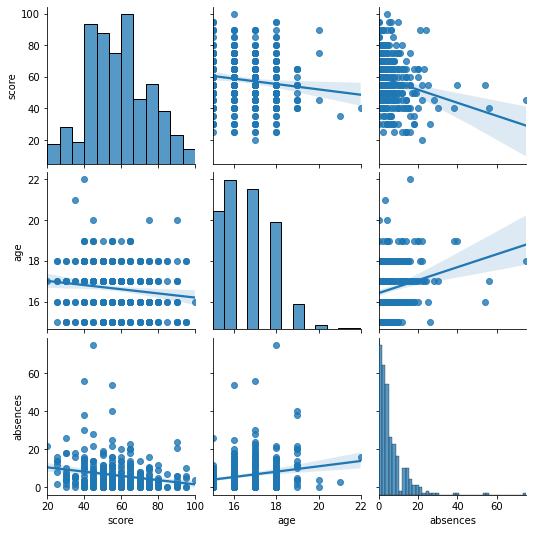

In [54]:
# Для числовых столбцов можно провести корреляционный анализ:

sns.pairplot(data[['score', 'age', 'absences']], kind='reg')

In [55]:
# Так-же для них создадим матрицу корреляций:
data[['score', 'age', 'absences']].corr()

,score,age,absences
score,1.000000,-0.131542,-0.214926
age,-0.131542,1.000000,0.211007
absences,-0.214926,0.211007,1.000000


In [56]:
# По матрице видно что возраст и количество пропусков имеют обратную корреляцию с результатами экзаменов.
# С количеством пропусков все более-менее понятно - чем меньше ученик ходит на занятия, тем хуже результаты.

# А корреляцию возраста с успеваемостью можно посмотреть подробнее:

data.groupby(['age']).score.agg(['count', 'min', 'max', 'median', 'mean'])

,count,min,max,median,mean
age,,,,,
15,76,25.0,95.0,60.0,60.723684
16,96,25.0,100.0,57.5,59.218750
17,90,20.0,90.0,55.0,55.944444
18,69,25.0,95.0,55.0,56.014493
19,16,40.0,65.0,55.0,52.812500
20,3,45.0,90.0,75.0,70.000000
21,1,35.0,35.0,35.0,35.000000
22,1,40.0,40.0,40.0,40.000000


In [57]:
# Судя по таблице действительно чем выше возраст, тем хуже оценки, за исключением 20 лет.
# 20-летних учеников у нас всего 3, посмотрим их оценки:

data[data.age == 20]['score']

306    90.0
376    75.0
390    45.0
Name: score, dtype: float64

Действительно сразу у двоих 20-летних учеников оценки сильно выше средних. Можно считать это выбросами или статистической погрешностью, для нашего анализа это не принципиально. Для остальных значений прослеживается явная обратная корреляция между возрастом и оценкой.

#### Бинарные переменные

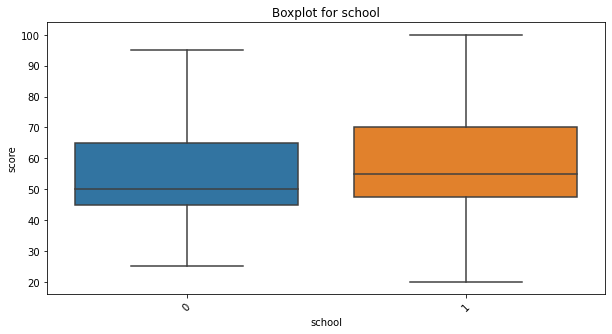

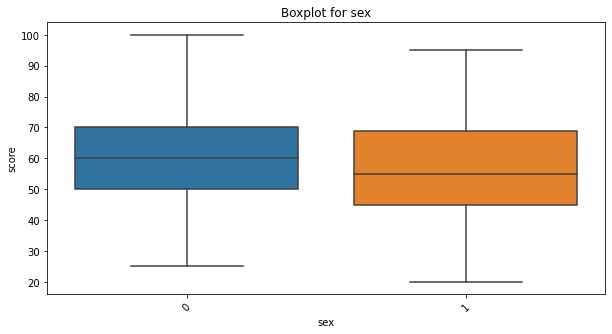

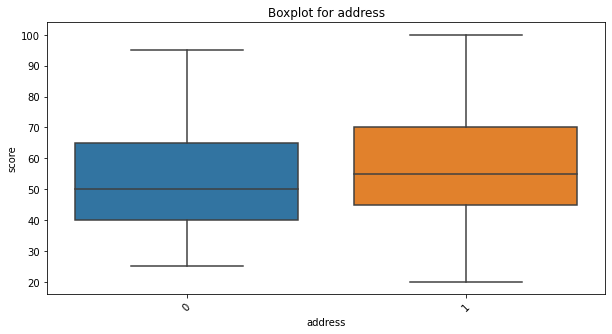

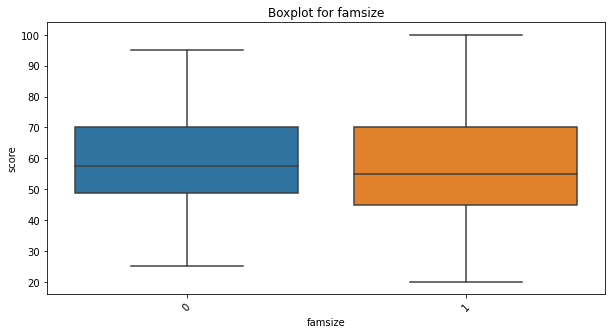

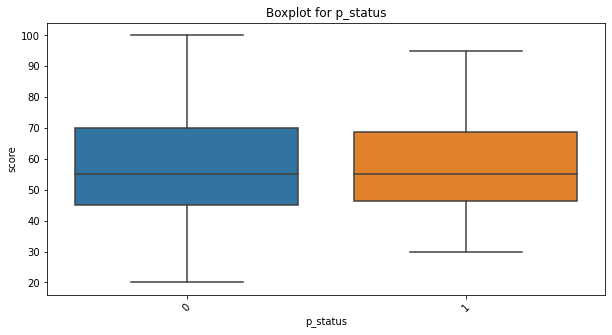

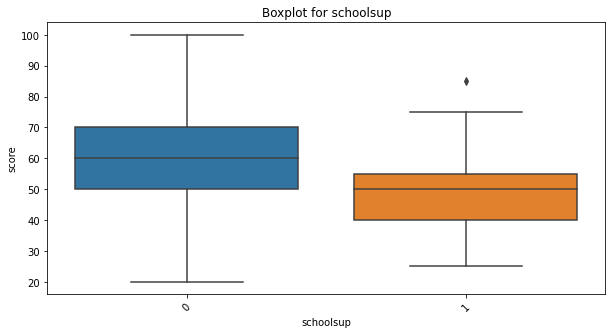

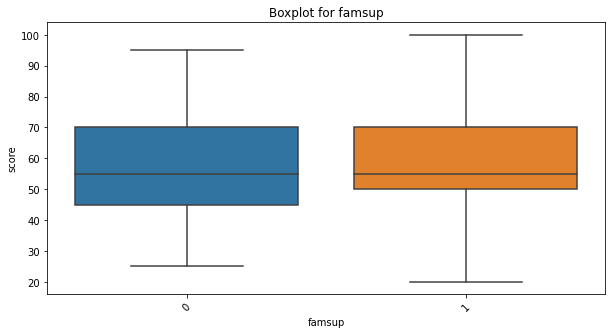

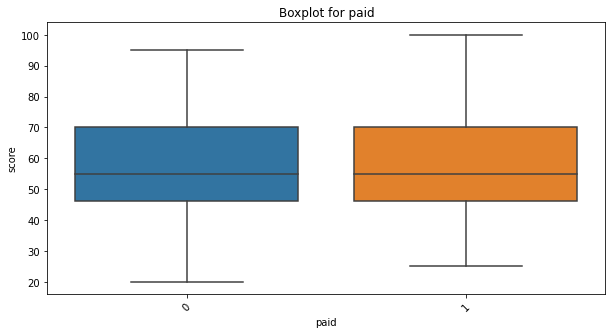

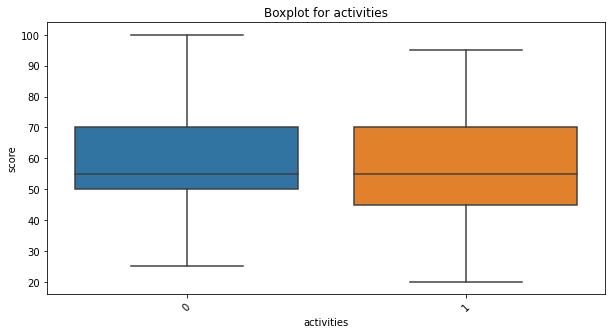

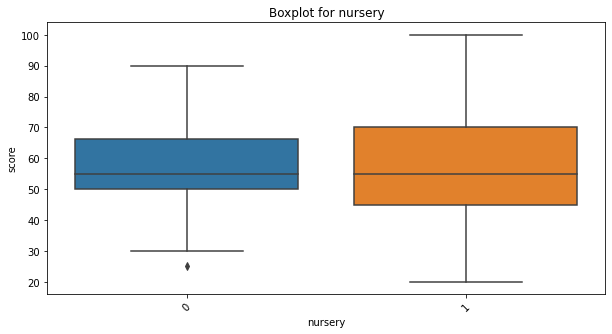

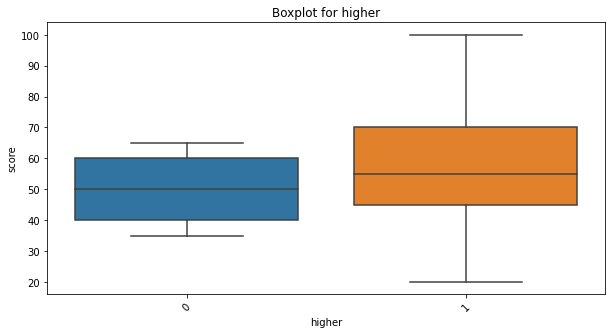

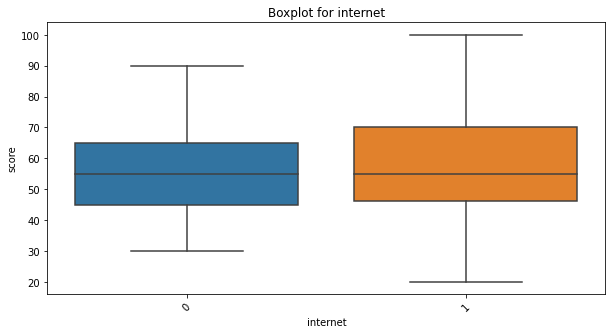

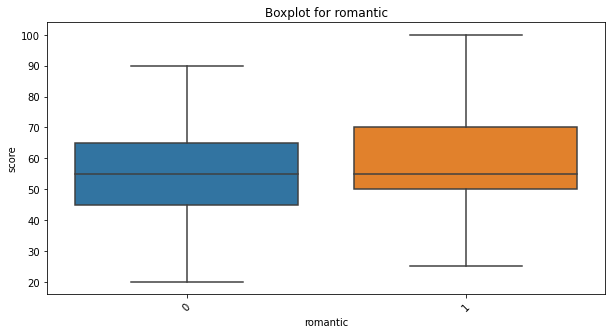

In [58]:
# Построим боксплоты для бинарных переменных:

for col in bin_cols:
    get_boxplot(col, 10, 5)

По графикам кажется что совсем не значимых колонок нет (кроме, возможно <i><b>paid</b></i>). 
Сильнее всего различия видны для колонок <i><b>schoolsup</b></i> и <i><b>higher</b></i>. 
Но, в любом случае, графики это лишь вспомогательный инструмент, так-что пока оставляем данные как есть и идем дальше.

#### Категориальные переменные

In [59]:
# Создаем список с именами категориальных столбцов:
cat_cols = ['m_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']

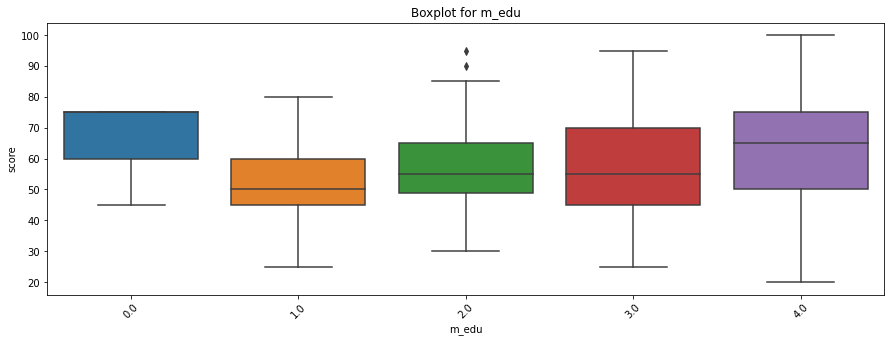

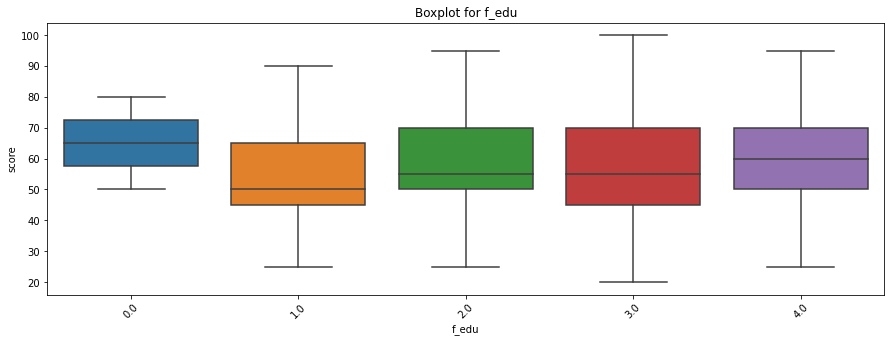

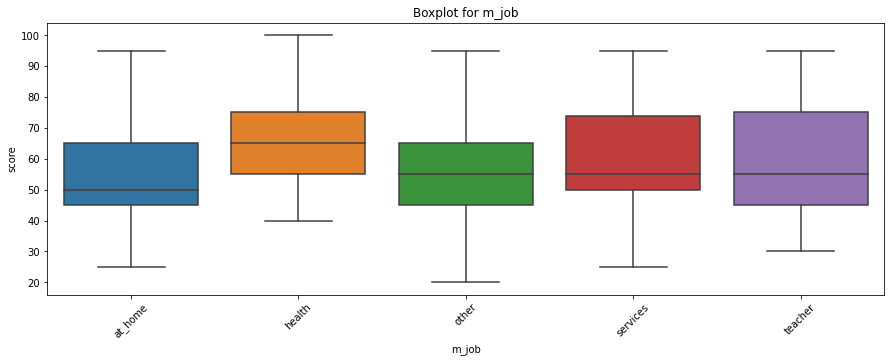

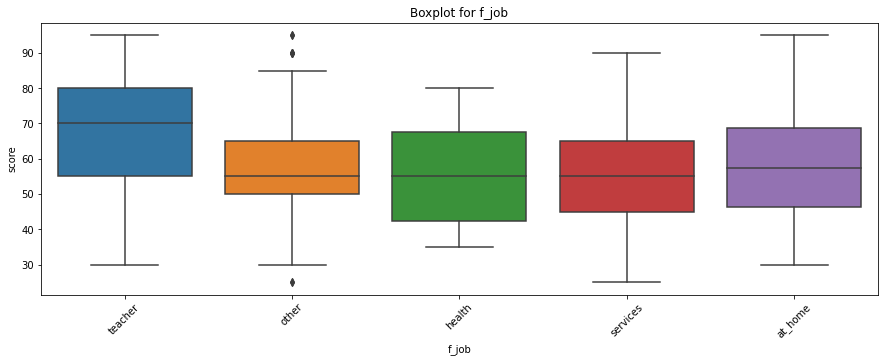

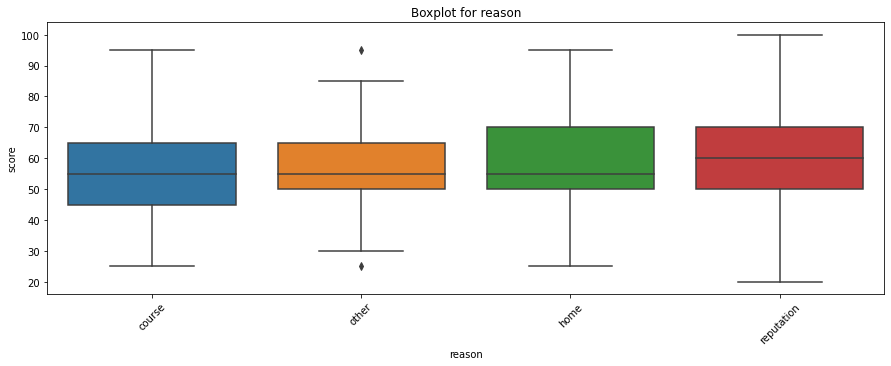

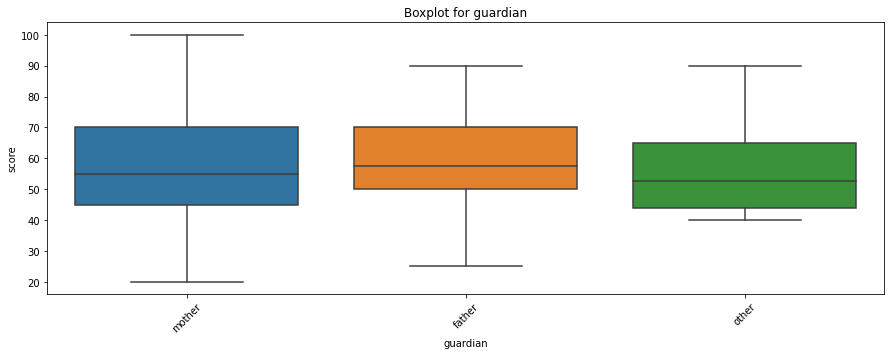

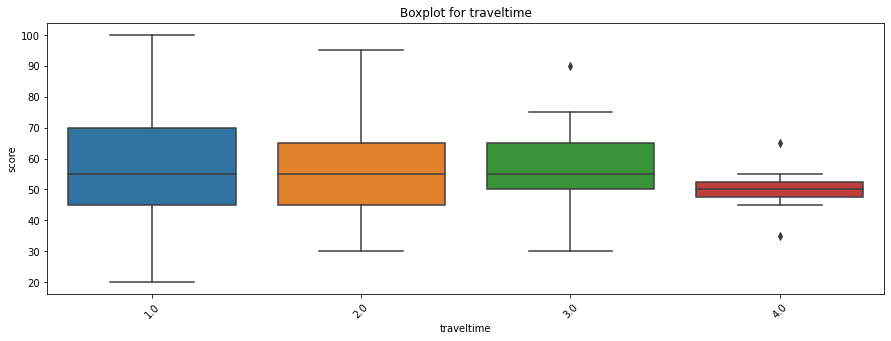

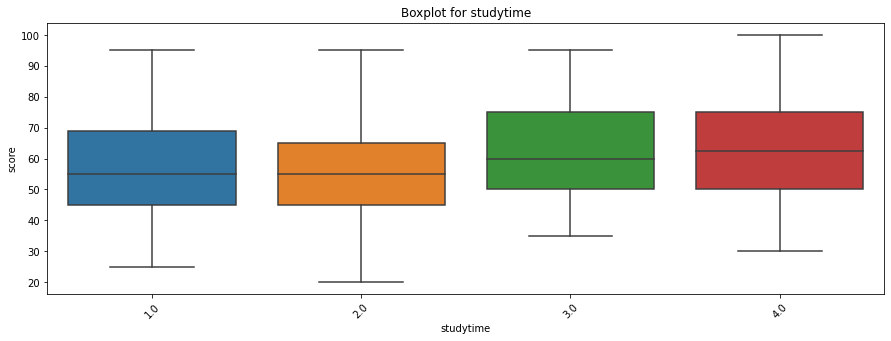

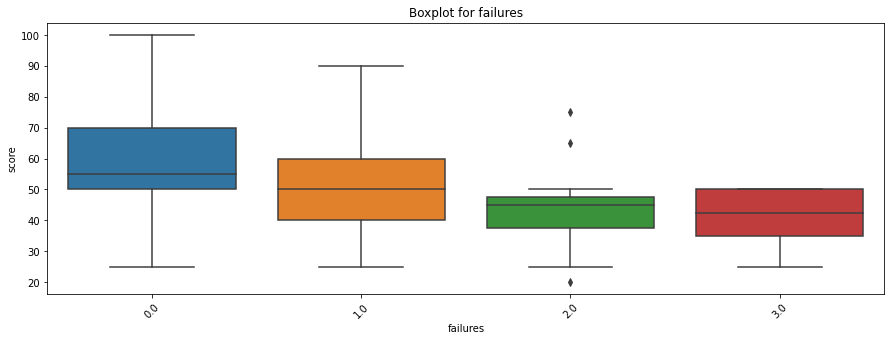

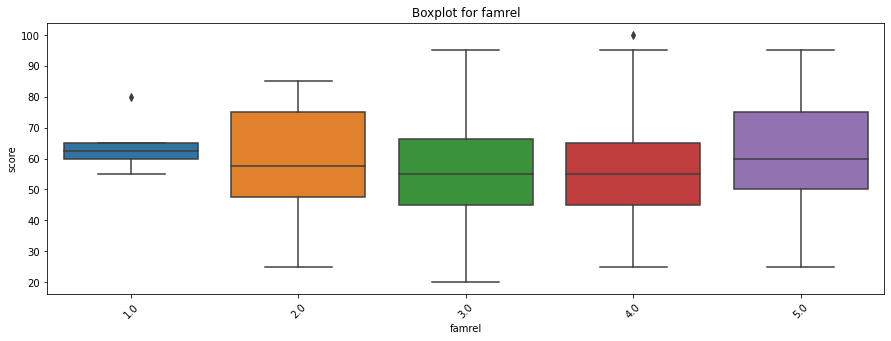

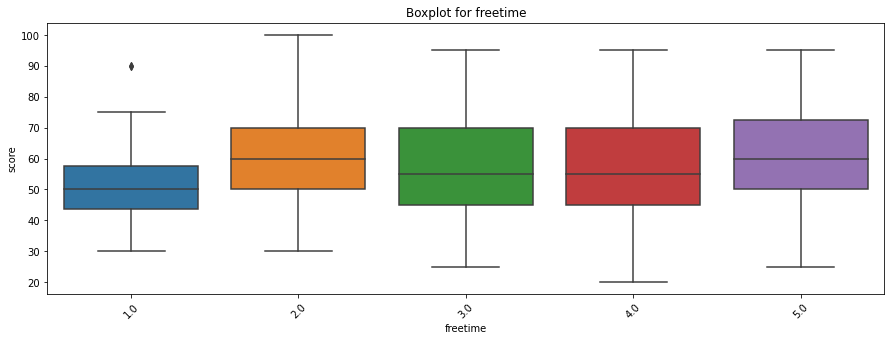

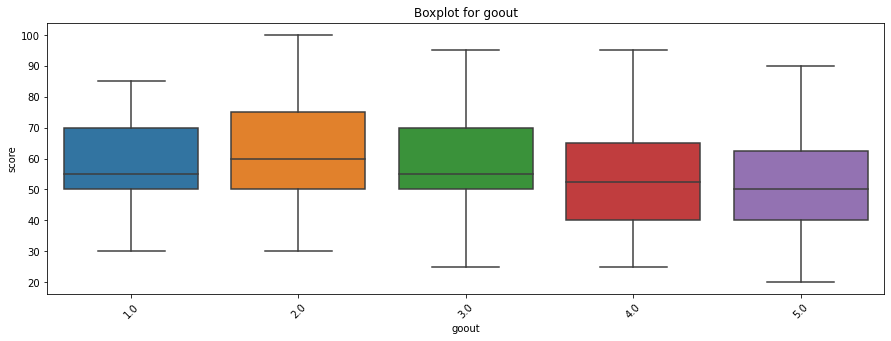

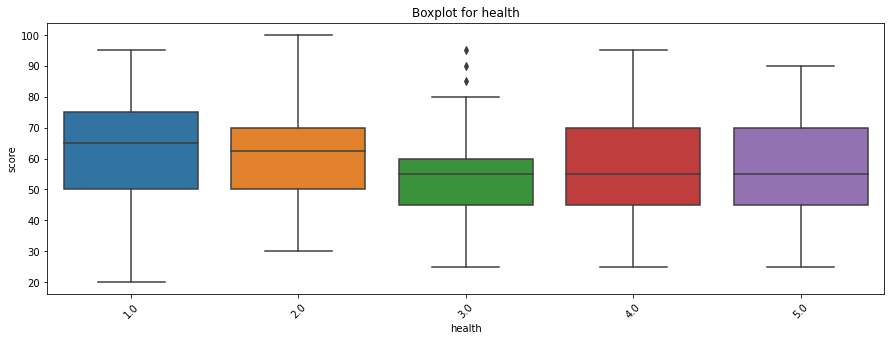

In [60]:
# Построим боксплоты для категориальных переменных:

for col in cat_cols:
    get_boxplot(col, 15, 5)

Судя по графикам колонок которые можно однозначно удалить нет. Визуально сильнее всего различаются распределения для колонок <i><b>m_edu</b></i>, <i><b>f_edu</b></i>, <i><b>m_job</b></i>, <i><b>f_job</b></i>, <i><b>failures</b></i> и <i><b>goout</b></i>.

Теперь, после того как мы рассмотрели графики для всех переменных мы можем переходить к статистике.

#### Тест Стьюдента для бинарных и категориальных столбцов

In [61]:
# Создадим общий список для бинарных и категориальных столбцов:

all_col = []
all_col.extend(bin_cols)
all_col.extend(cat_cols)

In [62]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок студентов по различным параметрам неразличимы:

def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in all_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


В результате теста Стьюдента мы видим что серьезно отличаются <b><i>9</i></b> категориальных параметров: <b><i>address</i></b>, <b><i>schoolsup</i></b>, <b><i>m_edu</i></b>, <b><i>f_edu</i></b>, <b><i>m_job</i></b>, <b><i>f_job</i></b>, <b><i>studytime</i></b>, <b><i>failures</i></b>, <b><i>failures</i></b>. Так-же не забываем про <b><i>3</i></b> численные параметры, важные для нашей модели:  <b><i>score</i></b>, <b><i>age</i></b>, <b><i>absences</i></b>. Всего получилось 12 значимых параметров, которые мы оставляем для дальнейшей работы.

In [63]:
# Создаем итоговый датасет:

data_for_model = data.loc[:, ['score', 'age', 'absences', 'address', 'schoolsup',
                              'm_edu', 'f_edu', 'm_job', 'f_job', 'studytime', 'failures', 'goout']]

In [64]:
# Проверяем что получилось:

data_for_model.sample(10)

,score,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout
374,95.0,18,0.0,0,0,4.0,NaN,other,NaN,3.0,0.0,4.0
273,70.0,17,2.0,0,0,1.0,2.0,at_home,at_home,2.0,0.0,2.0
66,60.0,15,4.0,1,0,4.0,4.0,other,services,4.0,0.0,3.0
348,75.0,17,0.0,NaN,0,4.0,3.0,health,other,3.0,0.0,3.0
106,40.0,15,8.0,1,1,2.0,2.0,other,other,4.0,0.0,2.0
390,45.0,20,NaN,1,0,2.0,2.0,services,services,2.0,2.0,4.0
117,65.0,16,0.0,1,0,3.0,3.0,other,services,1.0,0.0,2.0
72,25.0,15,2.0,0,1,1.0,1.0,other,other,2.0,2.0,4.0
302,70.0,17,0.0,1,0,4.0,2.0,other,other,3.0,0.0,3.0
330,40.0,18,2.0,1,0,2.0,2.0,other,other,4.0,0.0,5.0


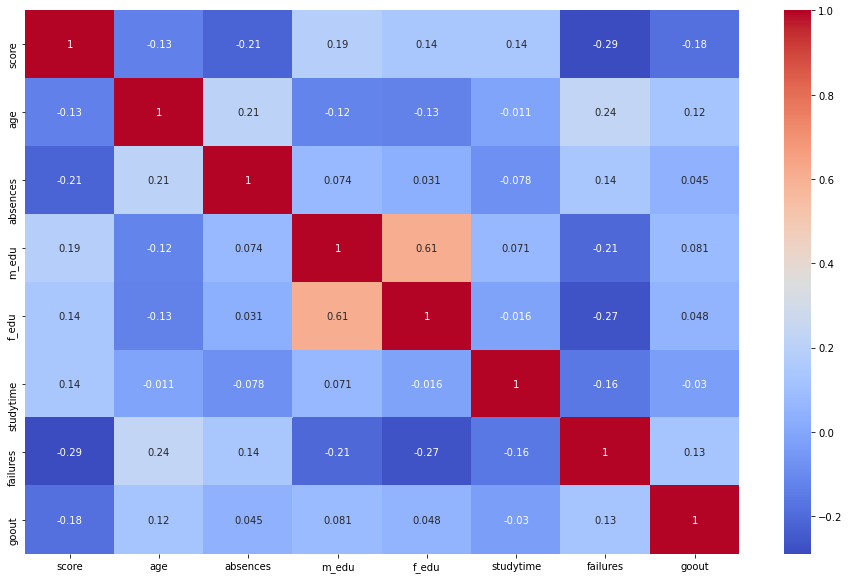

In [65]:
# Построим тепловую карту матрицы корреляций:

plt.figure(figsize=(16, 10))

ax = sns.heatmap(data_for_model.corr(), annot=True, cmap='coolwarm')

По тепловой карте видно, что в подготовленном нами датасете не осталось слишком слабо или слишком сильно скоррелированных параметров. 

Высокая корреляция между <b><i>m_edu</i></b> и <b><i>f_edu</i></b> объясняется схожим смыслом этих параметров, но они оба важны для нашей модели.

Также можно заметить отрицательную корреляцию целевого параметра <b><i>score</i></b> с параметрами <i><b>age</b></i> (возраст, уже замечено нами ранее), <i><b>absences</b></i> (количество пропусков, тоже замечено ранее), <i><b>failures</b></i> (количество внеучебных неудач, видимо проблемы в жизни плохо влияют на успеваемость) и <i><b>goout</b></i> (время проведенное с друзьями, тоже логично - чем больше времени с ними, тем меньше времени на учебу).

По карте видна положительная корреляция целевого параметра <b><i>score</i></b> с параметрами <b><i>m_edu</i></b> и <b><i>f_edu</i></b> (хорошее образование матери и отца, вероятно, оказывает положительное влияние на результаты ребенка), а также с параметром <b><i>studytime</i></b> (время на занятия помимо школы, достаточно логично, что чем больше ученик занимается, тем лучше будут результаты).

### <center>Выводы</center>

    Итак, в результате EDA для анализа влияния условий жизни учащихся на их оценки по математике были получены следующие выводы:
- В изначальном датасете почти в каждом столбце обнаружены пропуски (отсутствуют только в параметрах age, school и sex). В некоторых случаях количество пропусков достигает ~10% от общего числа строк; 
- Ошибочные значения (без учета параметра score) обнаружены только в стобцах f_edu и famrel;
- Выбросы обнаружены только в столбце absences (удалено 2 значения);
- В датсете присутствовал "лишний" столбец, оказавшийся "копией" столбца studytime с коэффициентом -3;
- В целевом параметре score было 6 пропсков, а также 37 параметров со значнием 0. Нулевые значения были приняты либо за пропуск экзаменов, либо как ошибочные и их пришлось удалить, т.к. они не годились для дальнейшей обработки.

    После обработки данных и проведения анализа сделаны следующие выводы и предположения:
1. Отрицательная корреляция параметра age с целевым параметром score - видно что с возрастом успеваемость ухудшается.
2. Отрицательная корреляция параметра absences со score - чем больше пропусков, тем хуже результат.
3. Отрицательная корреляция параметра failures со score - большое количество неудач в жизни плохо влияет на успеваемость в учебе.
4. Отрицательная корреляция параметра goout со score - слишком много времени, проводимого с друзьями, ухудшают результаты.
5. Положительная кореляция параметра m_edu со score - чем лучше образование матери, тем лучше учатся дети.
6. Положительная кореляция параметра f_edu со score - аналогично m_edu.
7. Положительная кореляция параметра studytime со score - чем больше ученик заниматеся помимо школы, тем лучше результаты.

    Выделено 12 самых важных параметров, которые предлагается использовать в дальнейшем для построения модели: score, age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, failures.